# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [53]:
#Import all the necessary modules
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from itertools import chain
from sklearn.model_selection import train_test_split
# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [2]:
pima_df = pd.read_csv("F:/dinesh/Great Lakes/Machine learning/Statistics/Algorithums/logistic/1547351116877_pima-indians-diabetes.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
pima_df.sample(10)

,preg,plas,Pres,Skin,Test,Mass,Pedi,Age,Class
513,2,91,62,0,0,27.3,0.525,22,0
491,2,89,90,30,0,33.5,0.292,42,0
701,6,125,78,31,0,27.6,0.565,49,1
689,1,144,82,46,180,46.1,0.335,46,1
23,9,119,80,35,0,29.0,0.263,29,1
135,2,125,60,20,140,33.8,0.088,31,0
675,6,195,70,0,0,30.9,0.328,31,1
619,0,119,0,0,0,32.4,0.141,24,1
704,4,110,76,20,100,28.4,0.118,27,0
741,3,102,44,20,94,30.8,0.400,26,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [144]:
pima_df.dtypes
pima_df.shape


preg       int64
plas       int64
Pres       int64
Skin       int64
Test       int64
Mass     float64
Pedi     float64
Age        int64
Class      int64
dtype: object

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [8]:
pima_df.columns
pima_df.median()
pima_df_impute = pima_df.loc[:,["plas","Pres","Skin","Test","Mass"]].apply(lambda col: col.replace(0,col.median()))
pima_df_impute.head()


Index(['preg', 'plas', 'Pres', 'Skin', 'Test', 'Mass', 'Pedi', 'Age', 'Class'], dtype='object')

preg       3.0000
plas     117.0000
Pres      72.0000
Skin      23.0000
Test      30.5000
Mass      32.0000
Pedi       0.3725
Age       29.0000
Class      0.0000
dtype: float64

,plas,Pres,Skin,Test,Mass
0,148,72,35,30.5,33.6
1,85,66,29,30.5,26.6
2,183,64,23,30.5,23.3
3,89,66,23,94.0,28.1
4,137,40,35,168.0,43.1


In [6]:

#pima_df_1.loc[pima_df_1["plas"]==0]
pima_df_imputed = pd.concat([pima_df.loc[:,['preg','Pedi', 'Age','Class']], pima_df_impute], axis=1, sort=False)

In [7]:
pima_df_imputed.head()
pima_df_imputed.loc[pima_df_imputed["plas"]==0]

,preg,Pedi,Age,Class,plas,Pres,Skin,Test,Mass
0,6,0.627,50,1,148,72,35,30.5,33.6
1,1,0.351,31,0,85,66,29,30.5,26.6
2,8,0.672,32,1,183,64,23,30.5,23.3
3,1,0.167,21,0,89,66,23,94.0,28.1
4,0,2.288,33,1,137,40,35,168.0,43.1


,preg,Pedi,Age,Class,plas,Pres,Skin,Test,Mass


# Q5 Print the descriptive statistics of each & every column using describe() function

In [9]:
pima_df_imputed.describe()

,preg,Pedi,Age,Class,plas,Pres,Skin,Test,Mass
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.471876,33.240885,0.348958,121.656250,72.386719,27.334635,94.652344,32.450911
std,3.369578,0.331329,11.760232,0.476951,30.438286,12.096642,9.229014,105.547598,6.875366
min,0.000000,0.078000,21.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000
25%,1.000000,0.243750,24.000000,0.000000,99.750000,64.000000,23.000000,30.500000,27.500000
50%,3.000000,0.372500,29.000000,0.000000,117.000000,72.000000,23.000000,31.250000,32.000000
75%,6.000000,0.626250,41.000000,1.000000,140.250000,80.000000,32.000000,127.250000,36.600000
max,17.000000,2.420000,81.000000,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

0    500
1    268
Name: Class, dtype: int64

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

The class seems to be biased towards not Diabetic(Class - 0), All Algorithum biased towards Majority class


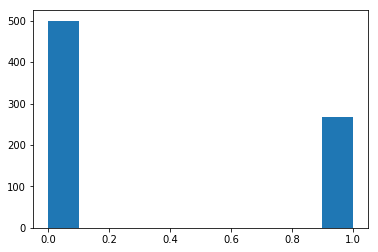

In [30]:
#pima_df_imputed.loc[:,["Class"]].groupby("Class").sum()
pima_df_imputed["Class"].value_counts()
plt.hist(pima_df_imputed["Class"])
print("The class seems to be biased towards not Diabetic(Class - 0), All Algorithum biased towards Majority class")

C:\Users\2124718\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Test and Preg looks to be right skewed


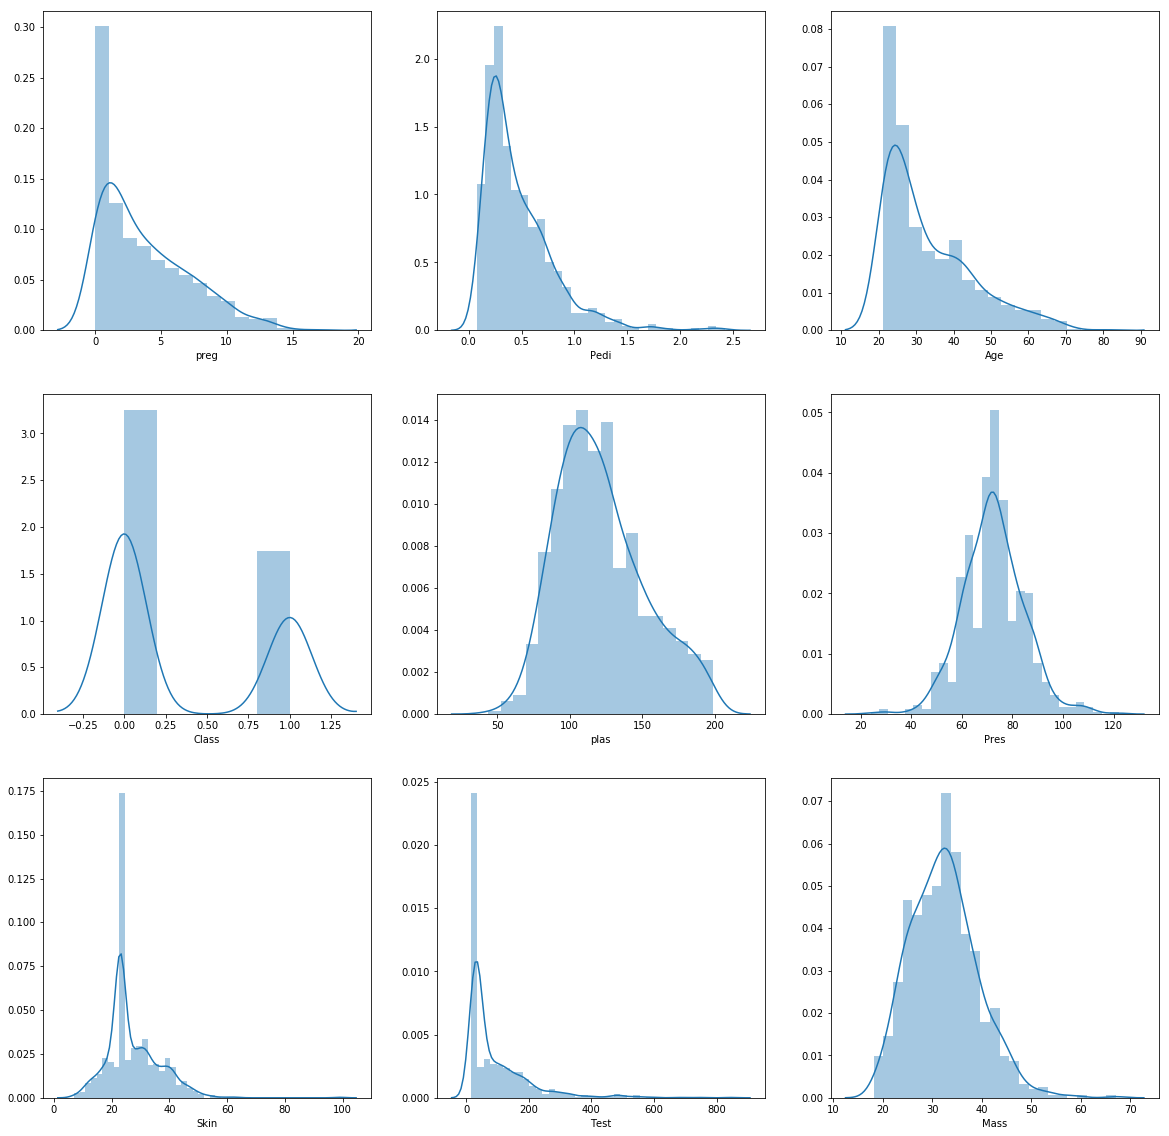

In [47]:
fig, axs = plt.subplots(nrows = 3, ncols =3,figsize =(20,20))
col_name = pima_df_imputed.columns
for i in range(0,len(col_name)):
    rows = i//3
    cols = i%3
    ax =axs[rows,cols]
    plot = sns.distplot(pima_df_imputed[col_name[i]],ax =ax)
print("Test and Preg looks to be right skewed")

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

C:\Users\2124718\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\2124718\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\2124718\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\2124718\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Kernel distribution plot that shows diagnolly looks like almost overlapped, and slight variation seen in Age,Mass and plas - Class distribution for individual feature
Skin and mass has slight linear patten


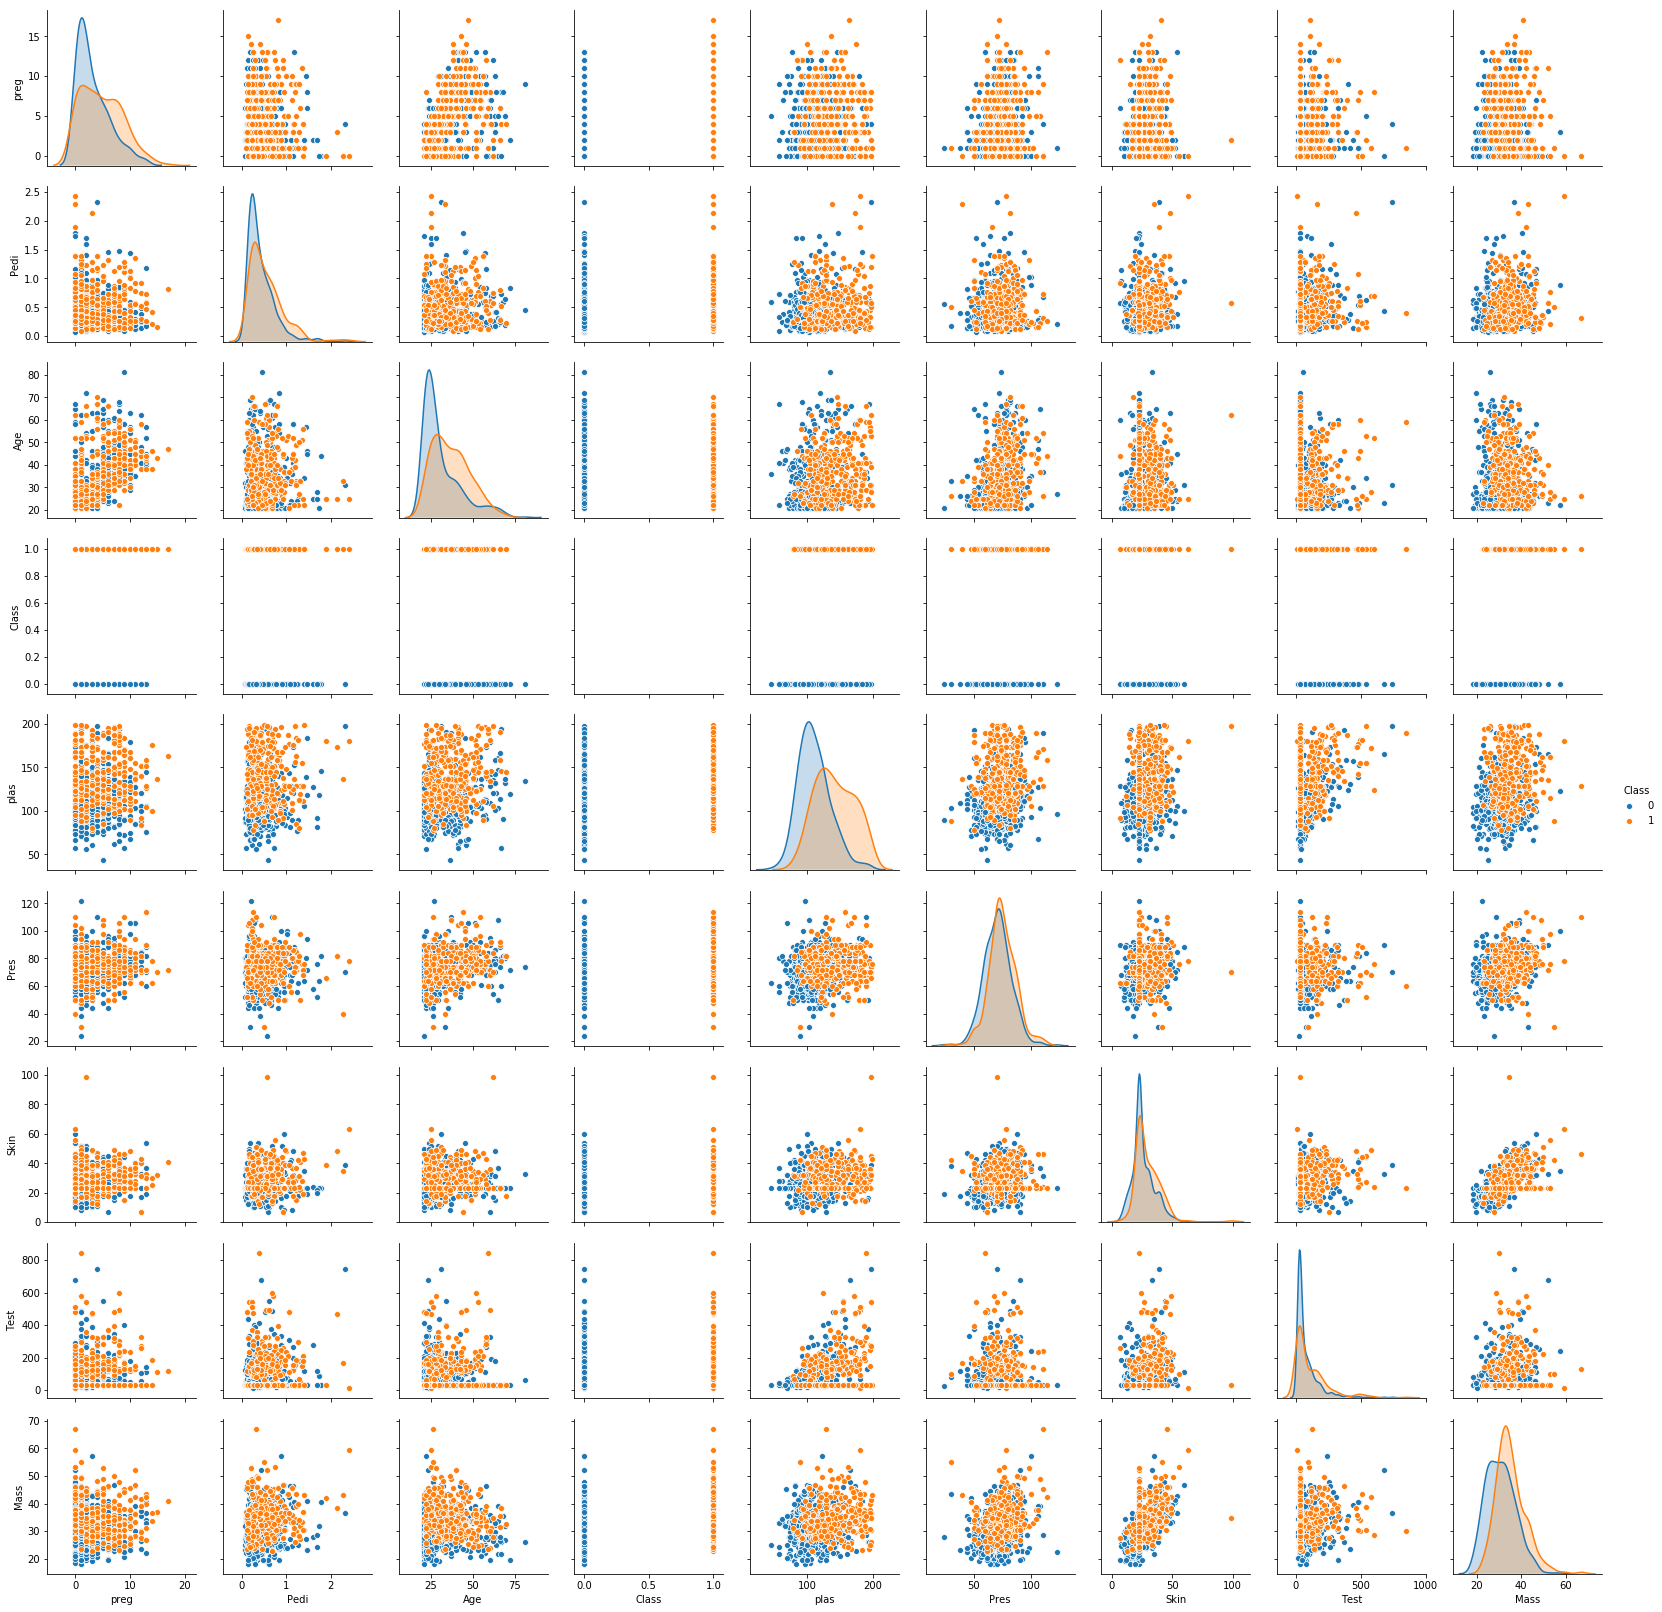

In [101]:
sns.pairplot(pima_df_imputed , hue='Class' , diag_kind = 'kde')
print("Kernel distribution plot that shows diagnolly looks like almost overlapped, and slight variation seen in Age,Mass and plas - Class distribution for individual feature")
print("Skin and mass has slight linear patten")

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [59]:
X = pima_df_imputed.drop("Class" , axis=1)

y = pima_df_imputed["Class"]


In [60]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [68]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4)
dt_model.fit(X_train, train_labels)
y_predict = dt_model.predict(X_test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [139]:
dt_model.score(X_train,train_labels)
dt_model.score(X_test,test_labels)
print(metrics.confusion_matrix(test_labels, y_predict))


0.7839851024208566

0.7835497835497836

[[129  17]
 [ 29  56]]


Print the feature importance of the decision model - Optional

In [140]:
print("Feature importance")
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

Feature importance
           Imp
preg  0.000000
Pedi  0.042685
Age   0.172289
plas  0.492520
Pres  0.015268
Skin  0.000000
Test  0.000000
Mass  0.277238


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [105]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators =80)
rfcl.fit(X_train, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [106]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , test_labels))

0.8051948051948052


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [128]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=100)####Your Code here###(base_estimator=dt_model, n_estimators=10)
abcl.fit(X_train, train_labels)
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , test_labels))

print(metrics.confusion_matrix(test_labels, y_predict))

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

0.7878787878787878
[[124  22]
 [ 27  58]]


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [130]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=100)

#bgcl = BaggingClassifier(n_estimators=50)
bgcl.fit(X_train, train_labels)
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , test_labels))

print(metrics.confusion_matrix(test_labels, y_predict))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

0.7922077922077922
[[129  17]
 [ 31  54]]


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [131]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl.fit(X_train, train_labels)
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

0.8008658008658008
[[129  17]
 [ 29  56]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [133]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [156]:
model = VotingClassifier(estimators=[('Lr',LogisticRegression()),('Sv',SVC()),('Gb',GradientBoostingClassifier())],voting ='hard')

model.fit(X_train, train_labels)

model.score(X_test , test_labels)

VotingClassifier(estimators=[('Lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('Sv', SVC(C=1...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

C:\Users\2124718\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7792207792207793